In [57]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [7]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [9]:
tickers = ['BAC','C','GS','MS','WFC']

In [10]:
bank_stocks = pd.concat([BAC,C,GS,JPM,WFC],axis=1,keys=tickers)

In [12]:
bank_stocks.head()

BAC                        ...        WFC                       
                 High        Low       Open  ...      Close      Volume  Adj Close
Date                                         ...                                  
2006-01-03  47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.444872
2006-01-04  47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.207729
2006-01-05  46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.185308
2006-01-06  46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.303877
2006-01-09  46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.300665

[5 rows x 30 columns]

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [15]:
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.444872
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.207729
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.185308
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.303877
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.300665

[5 rows x 30 columns]

In [16]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
MS      70.080002
WFC     58.520000
dtype: float64

In [17]:
returns = pd.DataFrame()

In [20]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [22]:
returns.head()

,BAC Return,C Return,GS Return,MS Return,WFC Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.000158


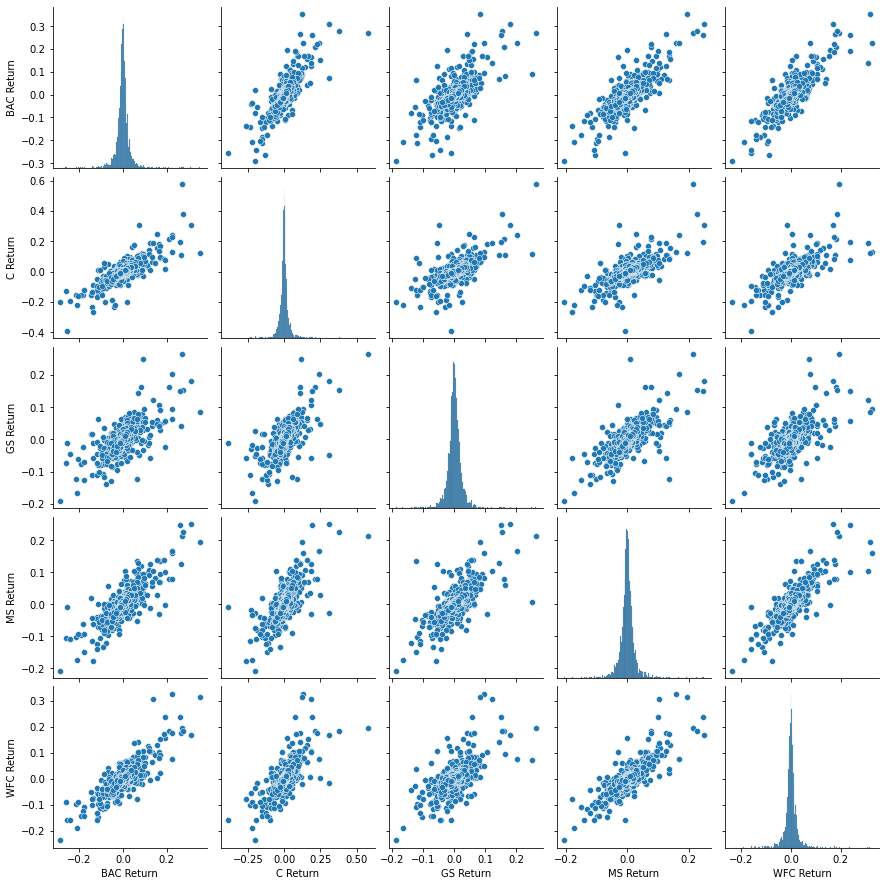

In [26]:
sns.pairplot(returns)

In [27]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
MS Return    2009-01-21
WFC Return   2008-07-16
dtype: datetime64[ns]

In [28]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
MS Return    2009-01-20
WFC Return   2009-01-20
dtype: datetime64[ns]

In [29]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
MS Return     0.027667
WFC Return    0.030238
dtype: float64

In [35]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
MS Return     0.014017
WFC Return    0.012591
dtype: float64

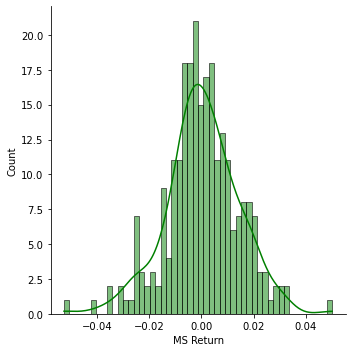

In [40]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=50,kde=True,color='Green')

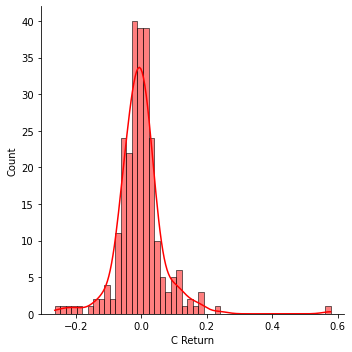

In [41]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=50,kde=True,color='Red')

In [44]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

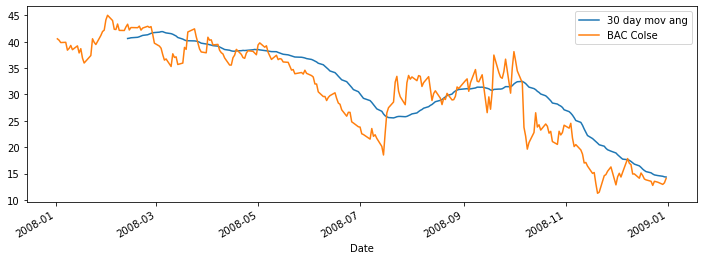

In [60]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day mov ang')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Colse')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

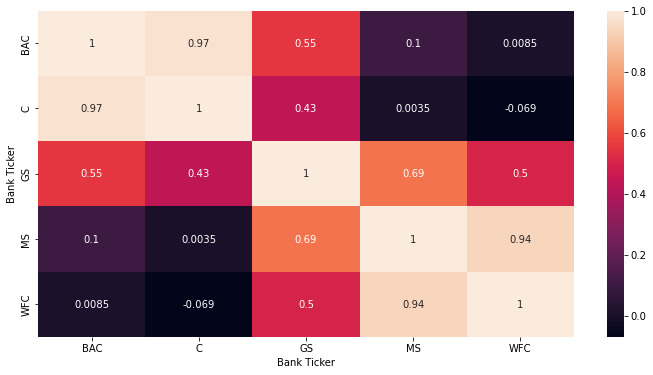

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

<Figure size 864x432 with 0 Axes>

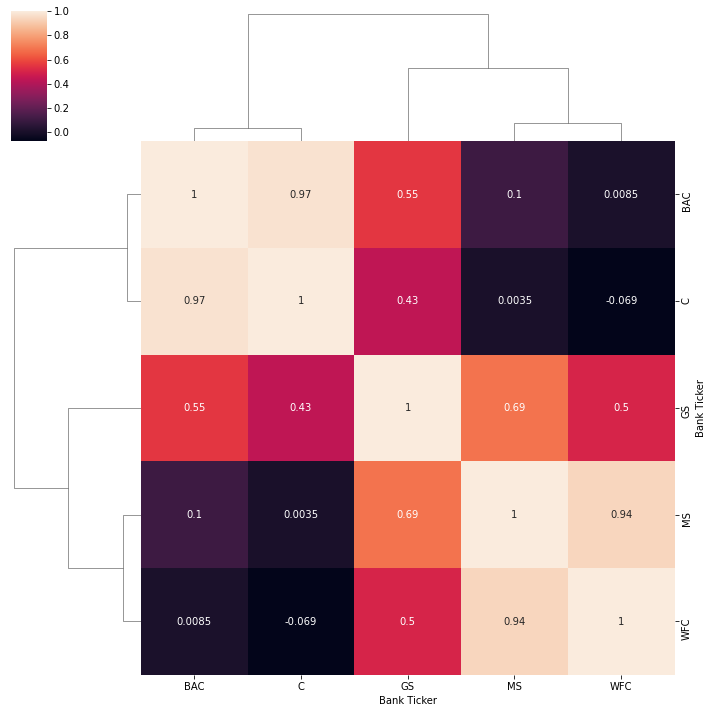

In [65]:
plt.figure(figsize=(12,6))
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [66]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [70]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [71]:
bac_15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']

In [72]:
bac_15.iplot(kind='candle')

In [73]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [74]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')